In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from lime.lime_tabular import LimeTabularExplainer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
import shap

c:\Users\Bruger\anaconda3\envs\python_3_10_16\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset from UCI repository
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(dataset_url, delimiter=';')

# Display basic dataset info
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Data preprocessing (Assuming target variable is 'quality')
X = df.drop(columns=['quality'])
y = df['quality']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

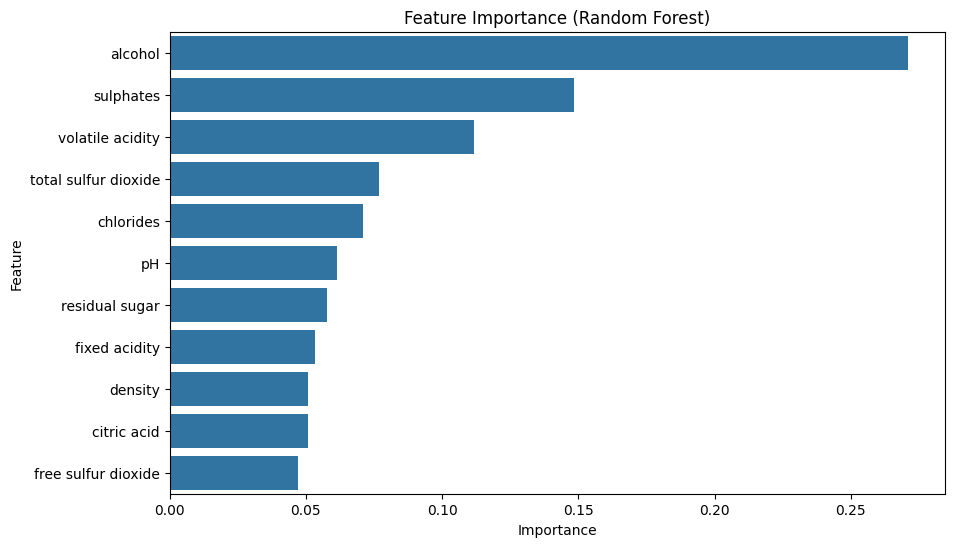


Partial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.


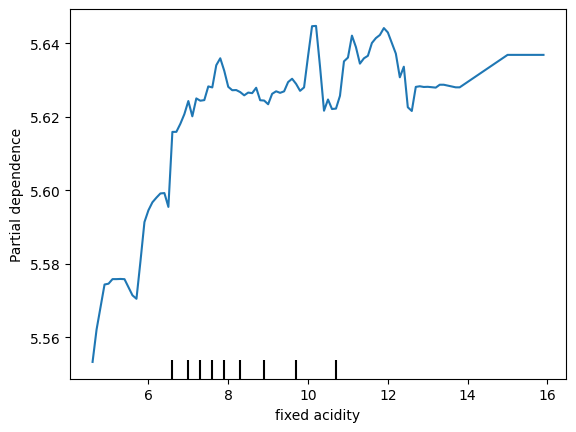

In [7]:
# Train a more complex model (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance for complex model
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Partial Dependence Plot for a single feature
print("\nPartial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.")
feature_idx = 0  # Change this to visualize different features
PartialDependenceDisplay.from_estimator(rf, X_train, [feature_idx])
plt.show()

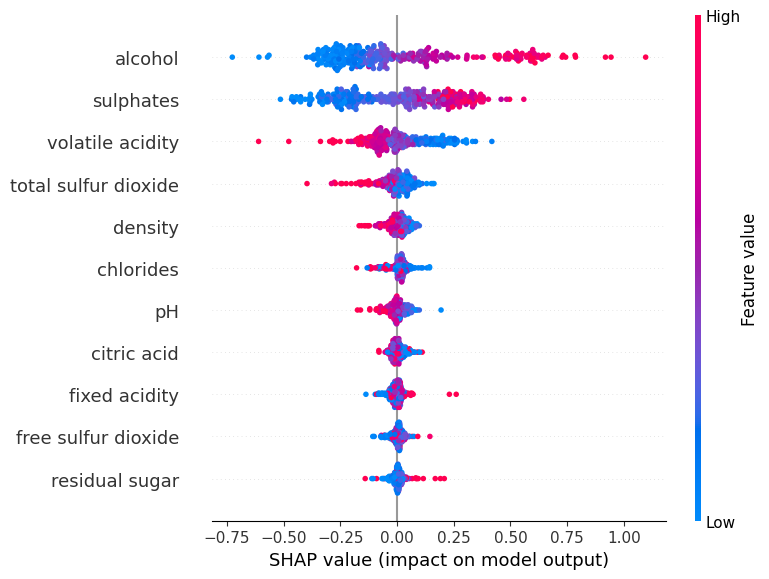

In [8]:
# SHAP values for Random Forest
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

### doing exercises

#### 1. Train at least two advanced models on the energy dataset from TSA_Example notebook. You may choose to use only the last 5 years of the dataset to reduce data size


In [9]:
# use random forest + linear regression

In [10]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bruger\.cache\kagglehub\datasets\robikscube\hourly-energy-consumption\versions\3


In [11]:
dataset_path = "C:/Users/Bruger/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3"

files = os.listdir(dataset_path)
print(files)

['AEP_hourly.csv', 'COMED_hourly.csv', 'DAYTON_hourly.csv', 'DEOK_hourly.csv', 'DOM_hourly.csv', 'DUQ_hourly.csv', 'EKPC_hourly.csv', 'est_hourly.paruqet', 'FE_hourly.csv', 'NI_hourly.csv', 'PJME_hourly.csv', 'PJMW_hourly.csv', 'pjm_hourly_est.csv', 'PJM_Load_hourly.csv']


In [12]:
file_path = "C:/Users/Bruger/.cache/kagglehub/datasets/robikscube/hourly-energy-consumption/versions/3/PJME_hourly.csv"

In [25]:
df = pd.read_csv(file_path)
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


In [26]:
df = df[(df.index.max() - pd.Timedelta(days=365*5)):df.index.max()]
df

,PJME_MW
Datetime,
2013-08-04 00:00:00,28588.0
2013-08-04 01:00:00,26466.0
2013-08-04 02:00:00,24892.0
2013-08-04 03:00:00,23879.0
2013-08-04 04:00:00,23165.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


In [27]:
def create_features(df):
    """
    Create time series features and lag features based on time series index.
    """
    df = df.copy()

    # Basic time-based features
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    # Lag features
    df['lag_1d'] = df['PJME_MW'].shift(1)   # 1 day lag
    df['lag_1w'] = df['PJME_MW'].shift(7)   # 1 week lag
    df['lag_1m'] = df['PJME_MW'].shift(30)  # 1 month lag (approx. 30 days)
    df['lag_1y'] = df['PJME_MW'].shift(365) # 1 year lag

    # Rolling statistics features
    df['rolling_mean_3d'] = df['PJME_MW'].rolling(window=3).mean()  # Last 3 days rolling mean
    df['rolling_mean_30d'] = df['PJME_MW'].rolling(window=30).mean()  # Last month rolling mean
    df['rolling_mean_same_month_last_year'] = df['PJME_MW'].shift(365).rolling(window=30).mean()  # Same month previous year rolling mean
    df['rolling_mean_same_week_last_year'] = df['PJME_MW'].shift(365).rolling(window=7).mean()  # Same week previous year rolling mean

    return df

df = create_features(df)

In [28]:
df = df.dropna()

<Figure size 640x480 with 0 Axes>

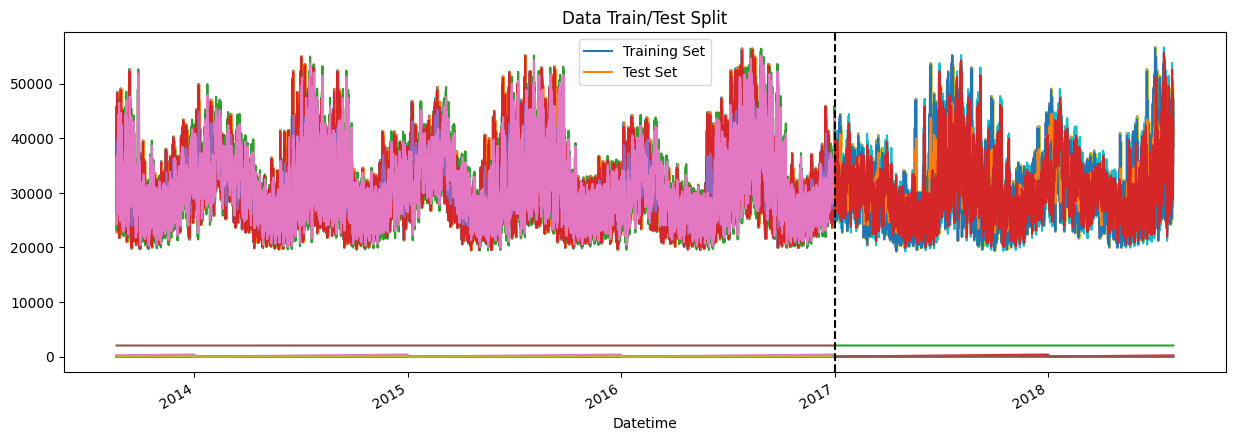

In [29]:
train = df.loc[df.index < '01-01-2017']
test = df.loc[(df.index >= '01-01-2017')]
plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [30]:
TARGET = 'PJME_MW'

FEATURES_XGB = [
    'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear',
    'lag_1d', 'lag_1w', 'lag_1m', 'lag_1y',
    'rolling_mean_3d', 'rolling_mean_30d', 'rolling_mean_same_month_last_year', 'rolling_mean_same_week_last_year'
]

In [31]:
# XGBoost Data
X_train_xgb = train[FEATURES_XGB]
y_train_xgb = train[TARGET]

X_test_xgb = test[FEATURES_XGB]
y_test_xgb = test[TARGET]

In [32]:
X_train_xgb

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag_1d,lag_1w,lag_1m,lag_1y,rolling_mean_3d,rolling_mean_30d,rolling_mean_same_month_last_year,rolling_mean_same_week_last_year
Datetime,,,,,,,,,,,,,,,,
2013-08-20 10:00:00,10,1,3,8,2013,232,20,34,32671.0,24604.0,22663.0,23166.0,32613.333333,31150.800000,28208.633333,25233.857143
2013-08-20 11:00:00,11,1,3,8,2013,232,20,34,34787.0,24178.0,23134.0,24437.0,34886.666667,31619.733333,28070.266667,24416.714286
2013-08-20 12:00:00,12,1,3,8,2013,232,20,34,37202.0,24430.0,24678.0,26197.0,37130.666667,32110.566667,28061.300000,24203.000000
2013-08-20 13:00:00,13,1,3,8,2013,232,20,34,39403.0,25890.0,26996.0,28501.0,39237.666667,32580.966667,28181.600000,24638.571429
2013-08-20 14:00:00,14,1,3,8,2013,232,20,34,41108.0,28174.0,29050.0,30472.0,41108.000000,33039.733333,28401.366667,25552.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,19,5,4,12,2016,366,31,52,34898.0,31084.0,32991.0,38749.0,34021.333333,32054.733333,40420.800000,41378.142857
2016-12-31 20:00:00,20,5,4,12,2016,366,31,52,34478.0,30461.0,32799.0,38790.0,34234.666667,32072.366667,40403.333333,40699.285714
2016-12-31 21:00:00,21,5,4,12,2016,366,31,52,33328.0,30043.0,32526.0,39299.0,33334.333333,32061.400000,40409.733333,40140.571429


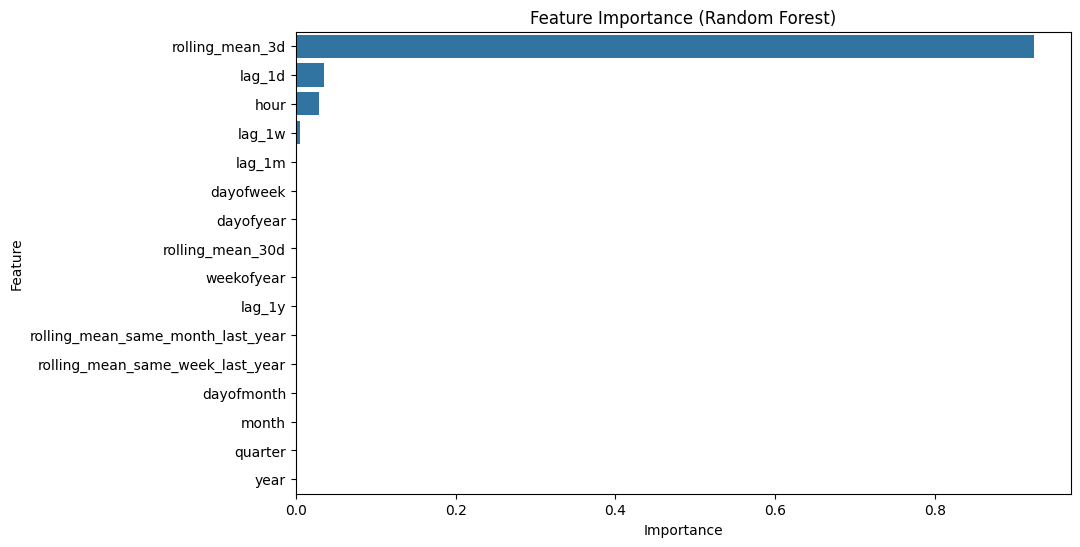


Partial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.


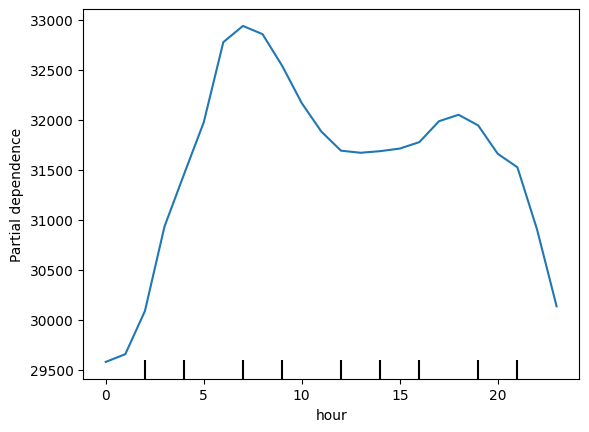

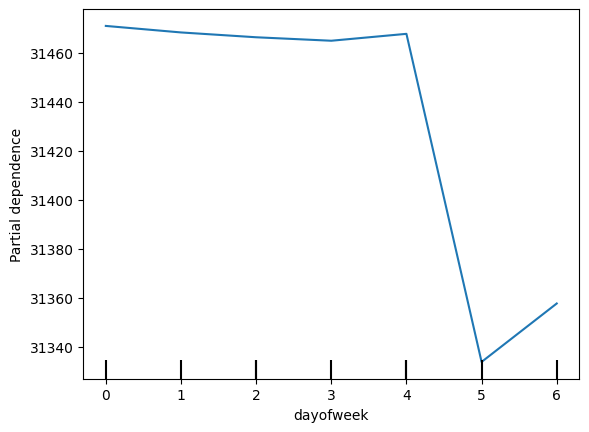

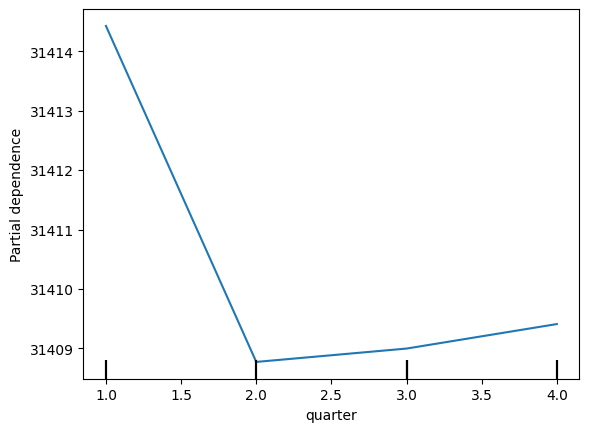

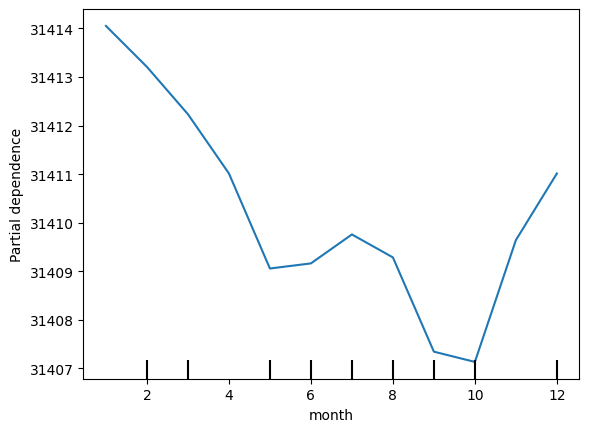

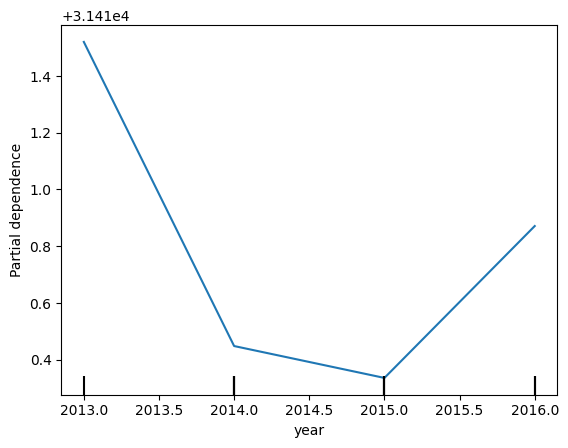

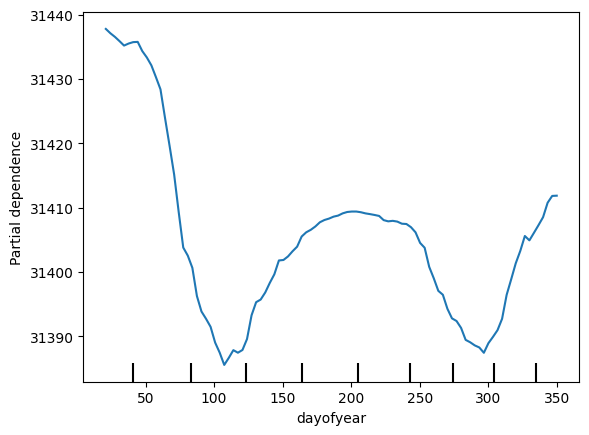

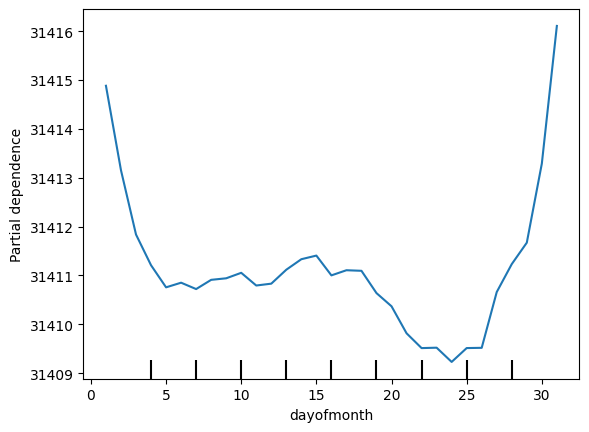

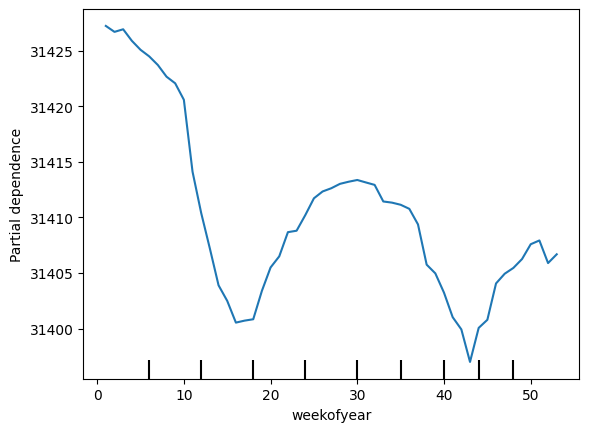

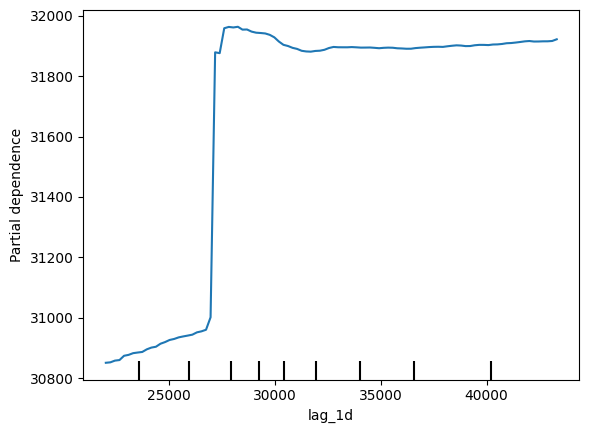

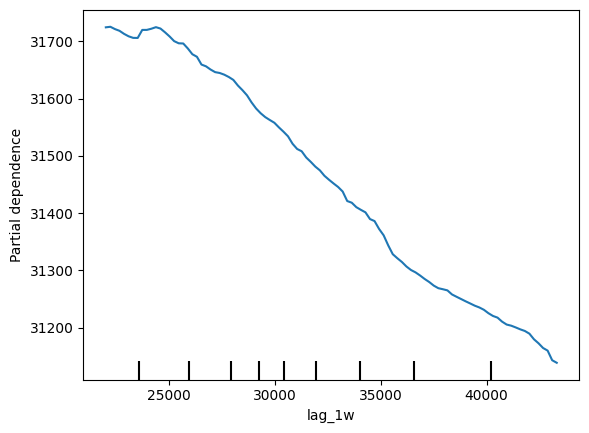

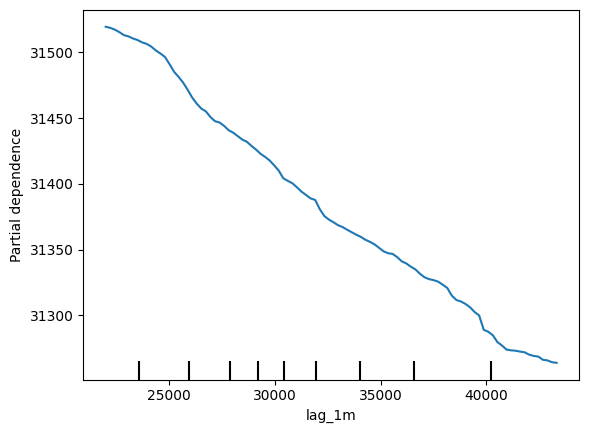

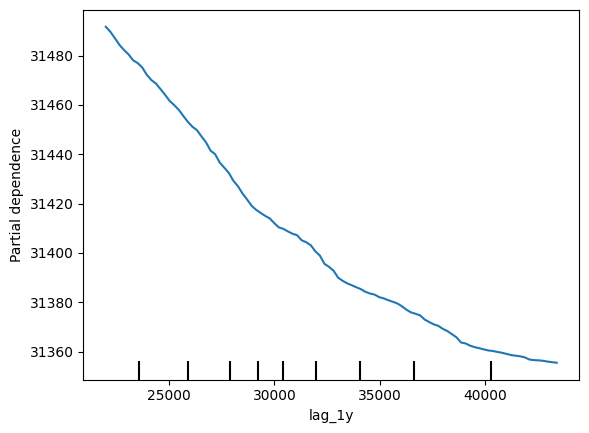

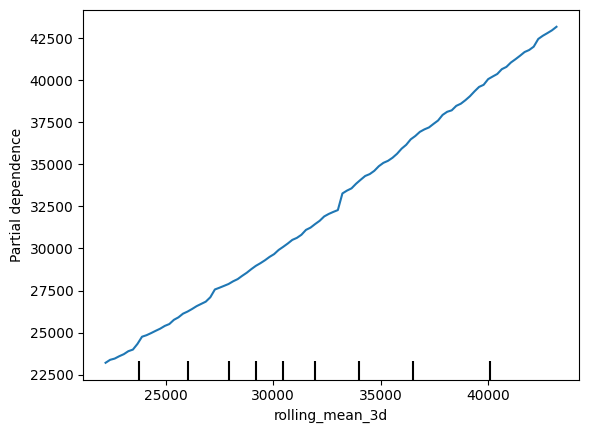

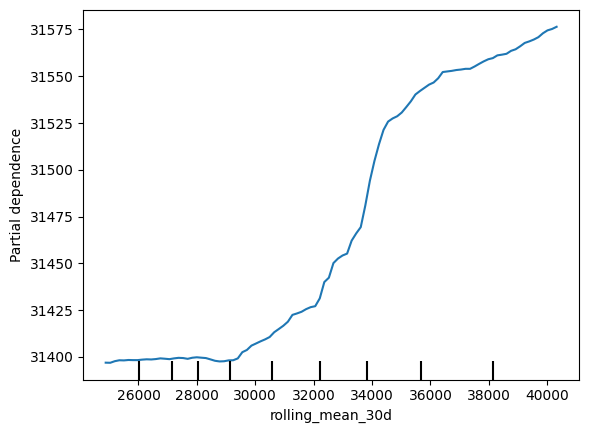

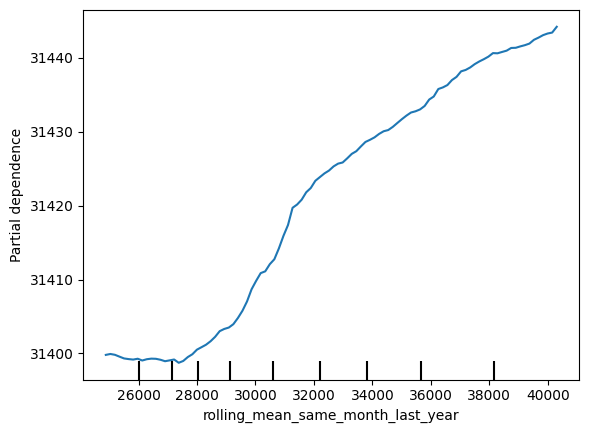

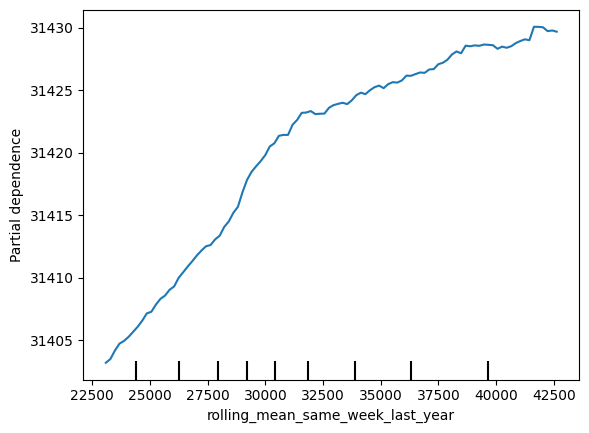

In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_xgb, y_train_xgb)

# Feature importance for complex model
importances = rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X_train_xgb.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Partial Dependence Plot for a single feature
print("\nPartial Dependence Plot (PDP) helps us understand the relationship between a specific feature and the predicted target while keeping other features constant. It shows how the model's prediction changes as the feature's value varies.")
feature_idx = 0  # Change this to visualize different features

for _index in X_train_xgb.columns:
    PartialDependenceDisplay.from_estimator(rf, X_train_xgb, [_index])
    plt.show()

In [34]:
"""explainer_xgb = shap.Explainer(rf, X_train_xgb)
shap_values_xgb = explainer_xgb(X_test_xgb)

shap.summary_plot(shap_values_xgb, X_test_xgb)
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0].values, X_test_xgb.iloc[0,:], matplotlib=True)"""

'explainer_xgb = shap.Explainer(rf, X_train_xgb)\nshap_values_xgb = explainer_xgb(X_test_xgb)\n\nshap.summary_plot(shap_values_xgb, X_test_xgb)\nshap.initjs()\nshap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0].values, X_test_xgb.iloc[0,:], matplotlib=True)'

In [36]:
# Train an XGBoost model
X_train_xgb = X_train_xgb.astype('float32')
X_test_xgb = X_test_xgb.astype('float32')

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Train a simple neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_xgb.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regression output layer
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_xgb, y_train_xgb, epochs=50, batch_size=16, verbose=1, validation_split=0.1)

Epoch 1/50


c:\Users\Bruger\anaconda3\envs\python_3_10_16\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1660/1660 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9736650.0000 - val_loss: 892425.5625
Epoch 2/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1068965.3750 - val_loss: 1385110.0000
Epoch 3/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1046010.4375 - val_loss: 808742.0625
Epoch 4/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 979532.8750 - val_loss: 1092717.0000
Epoch 5/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 930270.4375 - val_loss: 762600.8125
Epoch 6/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 887645.0000 - val_loss: 733125.2500
Epoch 7/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 871084.9375 - val_loss: 749978.6875
Epoch 8/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 789987.4375 - val_loss: 662587.5625
Epoch 9/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 738265.1875 - val_loss: 676237.1250
Epoch 10/50
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 715031.1875 - val_loss: 614910.1875
Epoch 11/50
1660/1660 ━━━

100%|===================| 13839/13896 [00:54<00:00]        

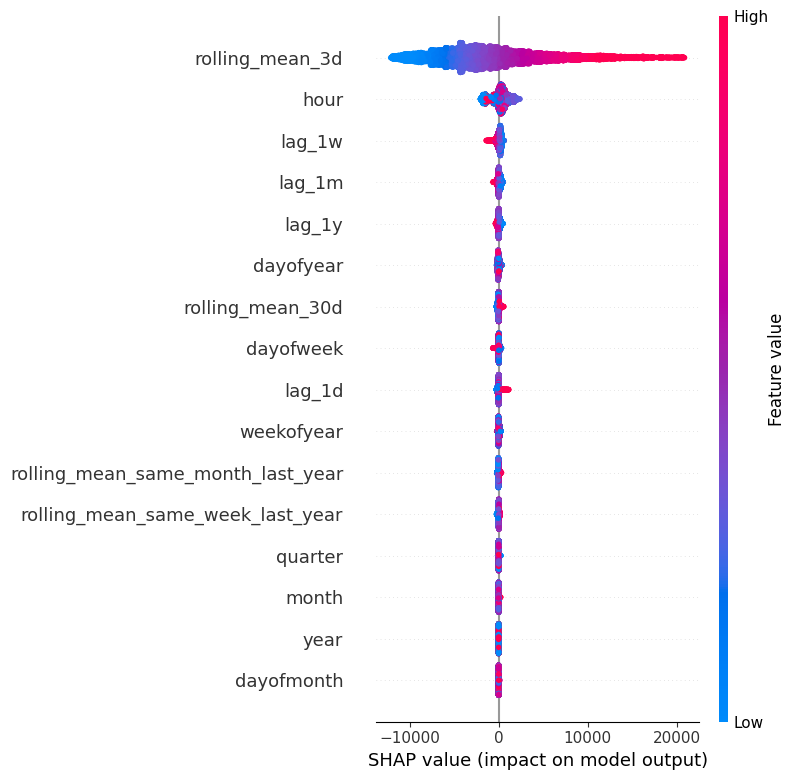

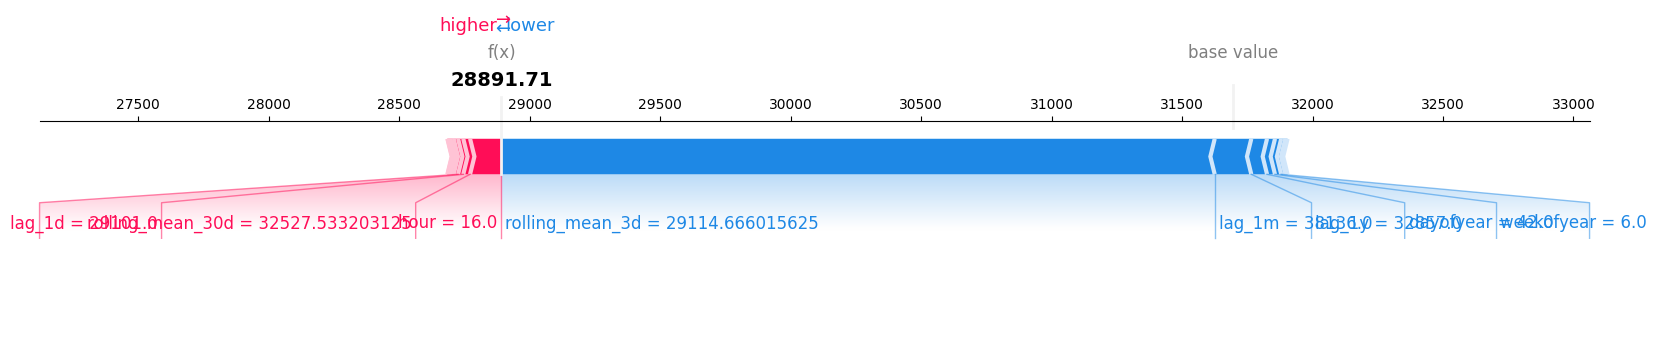

In [43]:
explainer_xgb = shap.Explainer(xgb_model, X_train_xgb)
shap_values_xgb = explainer_xgb(X_test_xgb)

shap.summary_plot(shap_values_xgb, X_test_xgb)
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[1000].values, X_test_xgb.iloc[1000,:], matplotlib=True)

In [38]:
explainer = LimeTabularExplainer(X_test_xgb.values, feature_names=X_test_xgb.columns,
                                 class_names=TARGET, 
                                 mode= 'regression')

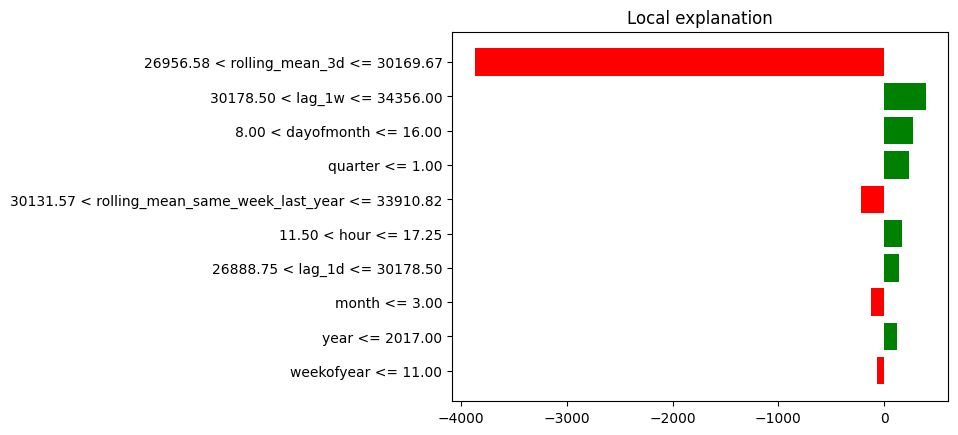

In [44]:
explanation = explainer.explain_instance(X_test_xgb.iloc[1000].values, xgb_model.predict)

# Show the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

fig = explanation.as_pyplot_figure()

# Show the plot explicitly
plt.show()

In [ ]:
explanation = explainer.(X_test_xgb.iloc[0].values, xgb_model.predict)

# Show the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

fig = explanation.as_pyplot_figure()

# Show the plot explicitly
plt.show()

TypeError: 'LimeTabularExplainer' object is not callable

In [40]:
#use shap and lime on xgboost